# **Using RNN to Predict Credit Card Fraud**

*Lingyu He, Sixin Ma, Linchen Wang, Junyao Wang*

**1. Import libraries and dataset**

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns

import tensorflow as tf 
import keras

Using TensorFlow backend.


In [0]:
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.5


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
sns.set()

In [0]:
#upload creditcard.csv to google drive -> Colab Notebooks before running this cell
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/creditcard.csv")

**2.  Exploratory Data Analysis**

In [0]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


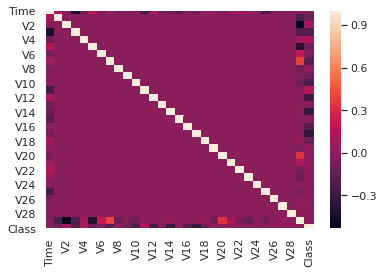

In [0]:
correlation = df.corr()
sns.heatmap(correlation)

**3. Prepare Data for ML Algo**

3.1 Train-test-split

In [0]:
features = df.drop('Class', axis = 1)
target = df['Class']

print(features.shape)
print(target.shape)

(284807, 30)
(284807,)


In [0]:
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [0]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size = 0.2, random_state = 42)

3.2 Standarize and tranform the data for RNN

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_trans)
X_train_pca = pca.transform(X_train_trans)
X_test_pca = pca.transform(X_test_trans)

**4. Benchmark: Logistic Regression and RandomForest Classifier(roughly tuned)**

4.1 Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [0]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
scores = cross_val_score(lr, X_train_pca, y_train, cv = 10, scoring = 'roc_auc')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
print(scores)
print(scores.mean(), scores.std())

[0.98915743 0.97604858 0.95539679 0.98229721 0.97075491 0.96889934
 0.99619753 0.96266297 0.9709319  0.99887944]
0.9771226105326123 0.013555686018750741


In [0]:
from sklearn.metrics import confusion_matrix
y_predict = lr.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[56855     9]
 [   41    57]]


In [0]:
fraud_conditional_prob = conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])
print(fraud_conditional_prob)

0.5816326530612245


4.2 RandomForest

In [0]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train_pca, y_train)
   train_pred = rf.predict(X_train_pca)
   test_pred = rf.predict(X_test_pca)
   train_results.append(metrics.accuracy_score(train_pred,y_train)) 
   test_results.append(metrics.accuracy_score(test_pred,y_test)) 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [0]:
train_results

[0.9983760890078781,
 0.9987140380521846,
 0.9990914876341372,
 0.9993372687572692,
 0.9994074919353069,
 0.9995347714455002,
 0.9995918277776559,
 0.9996444951611841,
 0.9996620509556936,
 0.9996927735960851,
 0.9997147183392219,
 0.9997191072878492,
 0.9997366630823586,
 0.9997322741337312,
 0.9997498299282407,
 0.9997629967741227,
 0.9998068862603964,
 0.999815664157651,
 0.9998376089007878,
 0.9998814983870614,
 0.9998946652329435,
 0.999877109438434,
 0.9998946652329435,
 0.9998946652329435,
 0.999890276284316,
 0.9999209989247075,
 0.9999166099760802,
 0.9998990541815708,
 0.9999034431301982,
 0.9998858873356887,
 0.9999122210274529,
 0.9998990541815708]

In [0]:
test_results

[0.9983673326077034,
 0.9986306660580738,
 0.9990344440153085,
 0.9991222218320986,
 0.9992802219023208,
 0.999403110845827,
 0.9994382219725431,
 0.9994733330992591,
 0.9994908886626171,
 0.9995084442259752,
 0.9994733330992591,
 0.9994557775359011,
 0.9994908886626171,
 0.9994908886626171,
 0.999420666409185,
 0.9995435553526912,
 0.9994733330992591,
 0.9994382219725431,
 0.999385555282469,
 0.9994382219725431,
 0.9994557775359011,
 0.9994908886626171,
 0.9994557775359011,
 0.9995435553526912,
 0.9994733330992591,
 0.9993679997191109,
 0.9994908886626171,
 0.999420666409185,
 0.999403110845827,
 0.9994382219725431,
 0.9994382219725431,
 0.9994382219725431]

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_depth=16, n_jobs=-1)
rf.fit(X_train_pca, y_train)
train_pred = rf.predict(X_train_pca)
test_pred = rf.predict(X_test_pca)

In [0]:
conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

fraud_conditional_prob = conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])
print(fraud_conditional_prob)

[[56863     1]
 [   28    70]]
0.7142857142857143


Random Forest Classfier gives predictions with high accuracies. However, it mispredicts 29 percent of class 1 (fraud), the performance is relatively low.

**5. RNN Classifier**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import embeddings
from keras import optimizers
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [0]:
#Failed Model
model = Sequential()

model.add(Dense(240, input_shape = (30,),activation = "relu")) #dense1

model.add(Dense(120, activation = "relu")) #dense 2

model.add(Dense(120, activation = "relu")) #dense 2

model.add(Dense(60, activation = "relu")) #dense 2

model.add(Dense(1, activation = None)) #logit

model.add(Dense(1, activation  = "relu")) #output (using softmax as the activation function yields a low accuracy= 0.016) 

opt = optimizers.Adam(lr = 0.0001, beta_1=0.9, beta_2=0.999, amsgrad=True)
model.compile(loss='binary_crossentropy', optimizer = opt,  metrics=['accuracy'])

Use binary_crossentropy as loss function, output layer using sigmoid as activation function, because of the nature of binary classification problem

All layers are dense. Gradually increase the number of hidden layer and the number of units inside a layer until getting a reasonable result.

Decrease the learning rate until it converges.

In [0]:
#Working Model
model = Sequential()

model.add(Dense(480, input_shape = (30,),activation = "relu")) #dense1

model.add(Dense(480, activation = "relu")) 

model.add(Dense(240,activation = "relu"))

model.add(Dense(120, activation = "relu")) #dense 2

model.add(Dense(120, activation = "relu")) #dense 2

model.add(Dense(60, activation = "relu")) #dense 2

model.add(Dense(60, activation = "relu"))

model.add(Dense(1, activation = "relu")) #logit

model.add(Dense(1, activation  = "sigmoid")) #output (using softmax as the activation function yields a low accuracy= 0.016) 

opt = optimizers.Adam(lr = 0.0008, beta_1=0.9, beta_2=0.999, amsgrad=True)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics = ['acc'])

In [0]:
history_2 = model.fit(X_train_pca, y_train, epochs = 1000, batch_size = 5000, class_weight={0 : 1., 1: (1/np.mean(y_train))}, validation_data=(X_test_pca, y_test))

Train on 227845 samples, validate on 56962 samples
Epoch 1/1000
227845/227845 [==============================] - 2s 8us/step - loss: 0.8709 - acc: 0.8073 - val_loss: 0.6820 - val_acc: 0.9990
Epoch 2/1000
227845/227845 [==============================] - 1s 5us/step - loss: 0.8027 - acc: 0.9963 - val_loss: 0.6629 - val_acc: 0.9993
Epoch 3/1000
227845/227845 [==============================] - 1s 5us/step - loss: 0.7702 - acc: 0.9905 - val_loss: 0.6486 - val_acc: 0.9956
Epoch 4/1000
227845/227845 [==============================] - 1s 5us/step - loss: 0.7460 - acc: 0.9815 - val_loss: 0.6360 - val_acc: 0.9865
Epoch 5/1000
227845/227845 [==============================] - 1s 5us/step - loss: 0.7197 - acc: 0.9907 - val_loss: 0.6158 - val_acc: 0.9943
Epoch 6/1000
227845/227845 [==============================] - 1s 5us/step - loss: 0.6996 - acc: 0.9947 - val_loss: 0.5987 - val_acc: 0.9978
Epoch 7/1000
227845/227845 [==============================] - 1s 5us/step - loss: 0.6819 - acc: 0.9967 - val_

In [0]:
keras.backend.clear_session()

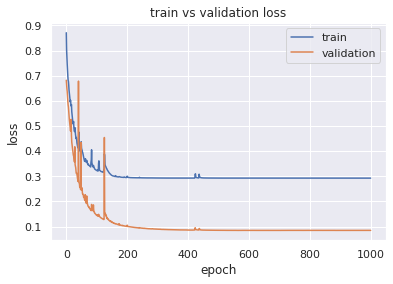

In [0]:
pyplot.plot(history_2.history['loss'])
pyplot.plot(history_2.history['val_loss'])
pyplot.title('train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [0]:
train_predict = model.predict_classes(X_train_pca)
test_predict = model.predict_classes(X_test_pca)

In [0]:
test_predict

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [0]:
metrics.accuracy_score(test_predict, y_test)

0.9993153330290369

In [0]:
conf_matrix = confusion_matrix(y_test, test_predict)
print(conf_matrix)

fraud_conditional_prob = conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])
print(fraud_conditional_prob)

[[56840    24]
 [   15    83]]
0.8469387755102041


Compared to the result from RandomForest, this model has a lower accuracy but a better performance in terms of identifying fraud. In other words, The model classifies more individual data as fraud, and it identifies more frauds than Random Forest.

The reason is probably that we did not resample the data for training the randomforest, so it was overfitted on class 0. As a result, it predicts more data as class 0 and reults in higher accuracy. However, the actual performance is worse than the RNN model.

In [0]:
keras.backend.clear_session()